In [34]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [35]:
path = untar_data(URLs.IMAGEWOOF_160)

In [36]:
data = (
    (
        ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(), size=64)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

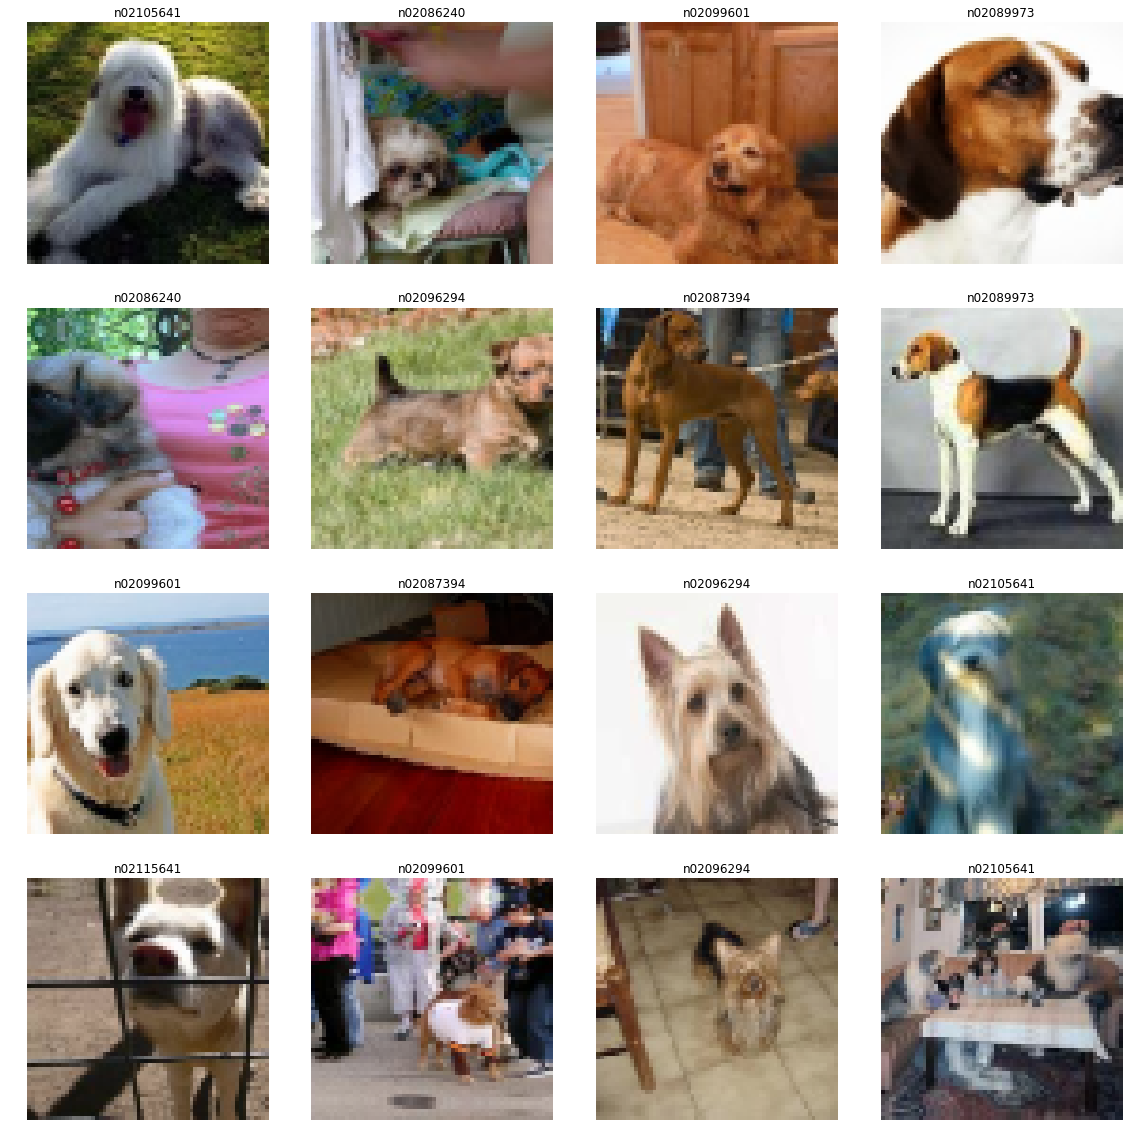

In [37]:
data.show_batch(4)

In [38]:
data.c

10

In [39]:
learn = None
gc.collect()

31406

In [40]:
learn = cnn_learner(
    data,
    models.resnet34,
    metrics=[accuracy],
    opt_func=AdamW,
    callback_fns=ShowGraph,
    pretrained=False,
)

epoch,train_loss,valid_loss,accuracy,time
0,2.952477,2.222477,0.209653,03:01


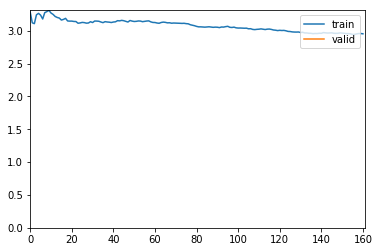

In [97]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-4, wd=10e-4)

In [42]:
layers = flatten_model(learn.model)

In [43]:
len(layers)

100

In [44]:
from fastai.callbacks import *

In [45]:
custom_hook = hook_outputs(layers)

In [46]:
learn.model.eval()
;

''

In [47]:
Path(path / "train/n02105641").ls()

[PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_5487.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_8379.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_10876.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_5917.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_7174.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_6246.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_2607.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_6245.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_2684.JPEG'),
 PosixPath('/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_9916.JPEG'),
 PosixPath('/home/subhaditya/.fastai/da

In [48]:
img_path = (
    "/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_6246.JPEG"
)

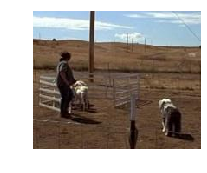

In [121]:
img = open_image(img_path)
img.show()

In [122]:
learn.predict(img)

(Category tensor(6),
 tensor(6),
 tensor([0.0477, 0.1599, 0.0159, 0.0790, 0.1013, 0.0998, 0.2527, 0.0633, 0.1135,
         0.0669]))

In [123]:
len(custom_hook.stored)

100

In [124]:
[custom_hook.stored[i].shape for i in range(len(custom_hook.stored))]

[torch.Size([1, 64, 32, 32]),
 torch.Size([1, 64, 32, 32]),
 torch.Size([1, 64, 32, 32]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 128, 8, 

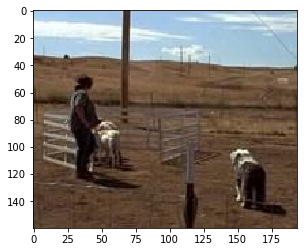

In [125]:
plt.imshow(plt.imread(img_path))

In [126]:
stored_hooks_rank = [
    len(custom_hook.stored[i].shape) for i in range(len(custom_hook.stored))
]

In [55]:
min_rank = min(
    [len(custom_hook.stored[i].shape) for i in range(len(custom_hook.stored))]
)
min_rank

2

In [56]:
first_flat_layer = stored_hooks_rank.index(min_rank)
first_flat_layer

92

In [57]:
def show_2D_act(hook, l=0, nrows=3, ncols=9, s=12):
    """Show nrows*ncols activation visualizations of the l-th layer with figsize s*s"""
    fig, axes = plt.subplots(nrows, ncols, figsize=(s, s / 3))
    fig.subplots_adjust(hspace=0.1, wspace=0, left=0, right=1, top=1, bottom=0)
    for i, ax in enumerate(axes.flat):
        ax.imshow(custom_hook.stored[l][0][i].cpu(), cmap="magma")
        ax.set_axis_off()

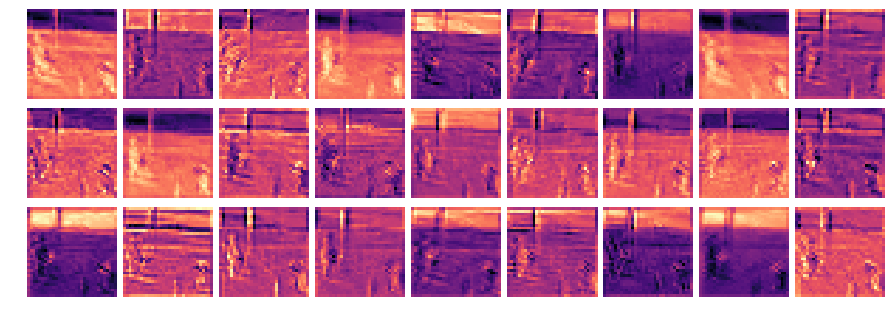

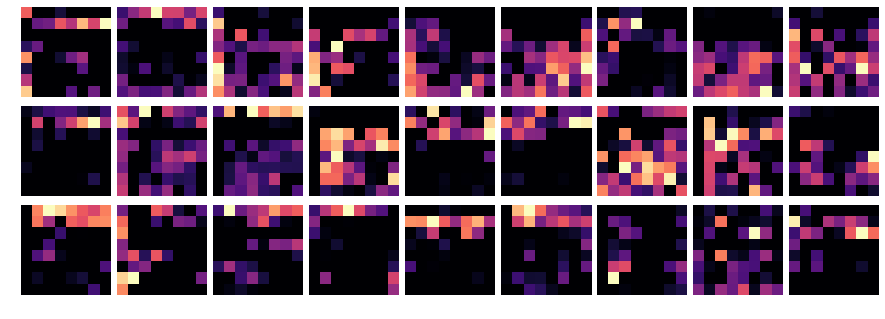

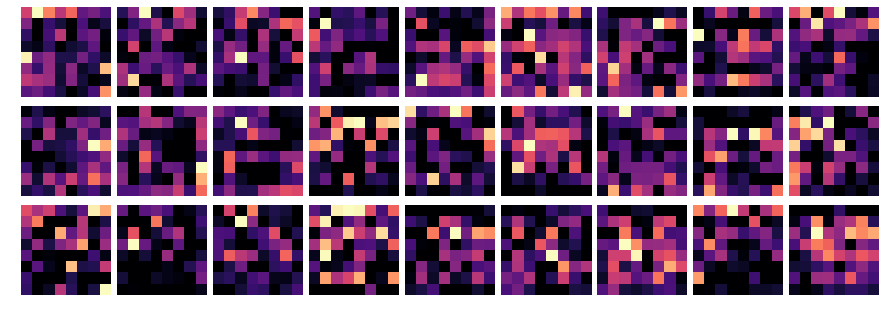

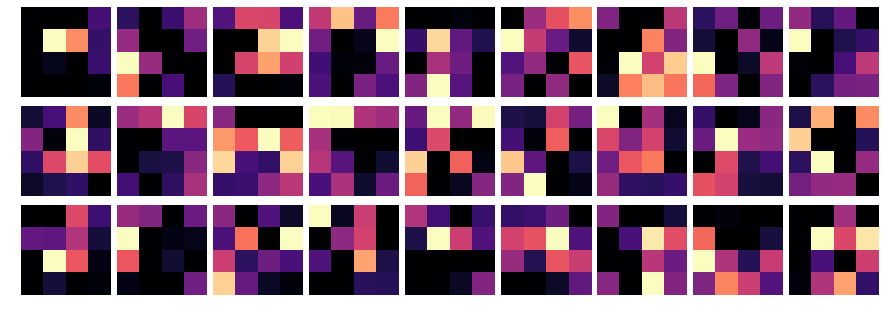

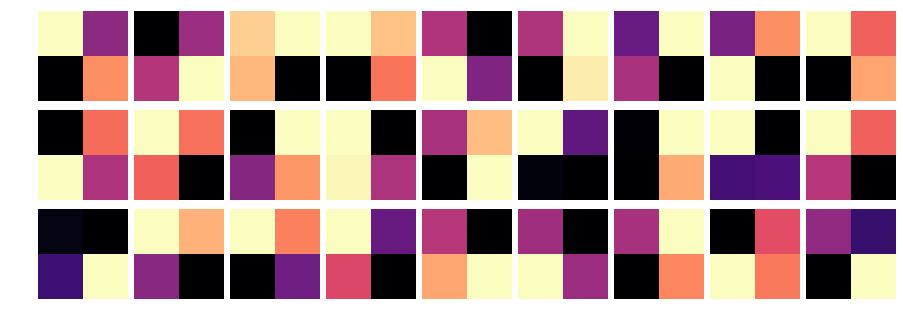

In [65]:
for i in range(0, 100, 20):
    show_2D_act(custom_hook, i)

## Refactor

In [59]:
from fastai.callbacks import *

In [78]:
def show_2D_act(hook, l=0, nrows=3, ncols=9, s=12):
    """Show nrows*ncols activation visualizations of the l-th layer with figsize s*s"""
    fig, axes = plt.subplots(nrows, ncols, figsize=(s, s / 3))
    fig.subplots_adjust(hspace=0.1, wspace=0, left=0, right=1, top=1, bottom=0)
    for i, ax in enumerate(axes.flat):
        ax.imshow(custom_hook.stored[l][0][i].cpu(), cmap="magma")
        ax.set_axis_off()

In [131]:
# %debug
def create_layer_vis(x, img):
    layers = flatten_model(x)
    print(len(layers))
    custom_hook = hook_outputs(layers)
    
    learn.model.eval()
    img = open_image(img_path)
    learn.predict(img)
    [custom_hook.stored[i].shape for i in range(len(custom_hook.stored))]

    stored_hooks_rank = [
        len(custom_hook.stored[i].shape) for i in range(len(custom_hook.stored))
    ]
    min_rank = min(
        [len(custom_hook.stored[i].shape) for i in range(len(custom_hook.stored))]
    )

    for i in range(0, len(layers), 10):
        show_2D_act(custom_hook, i)

100


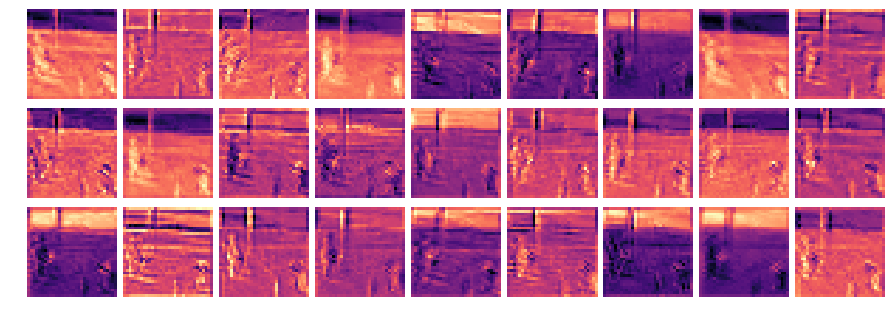

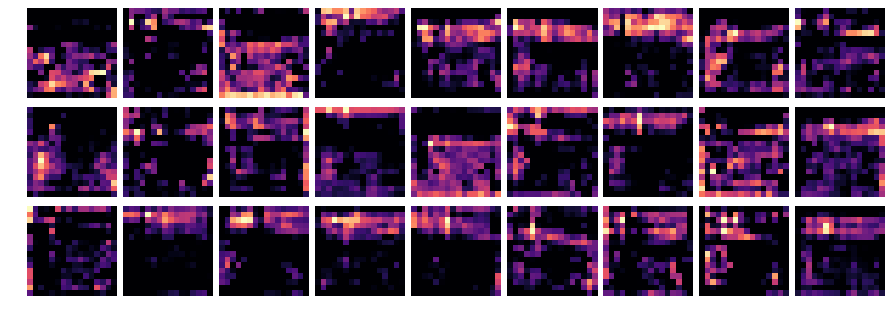

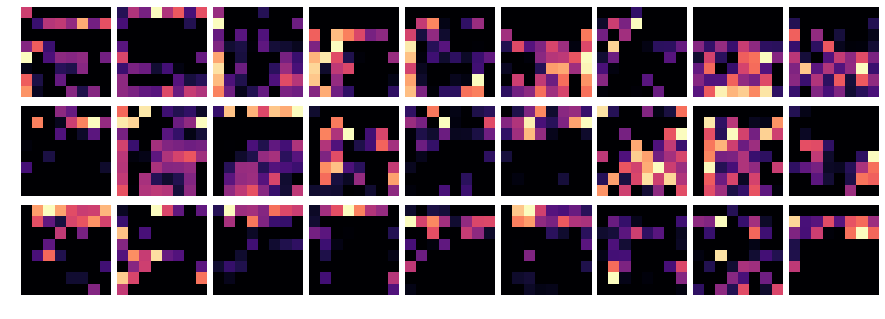

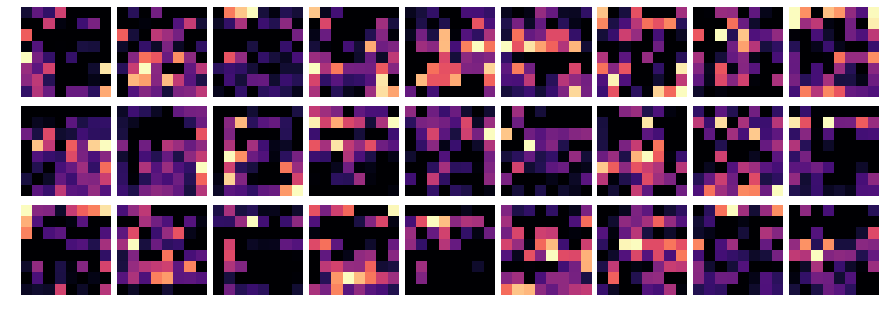

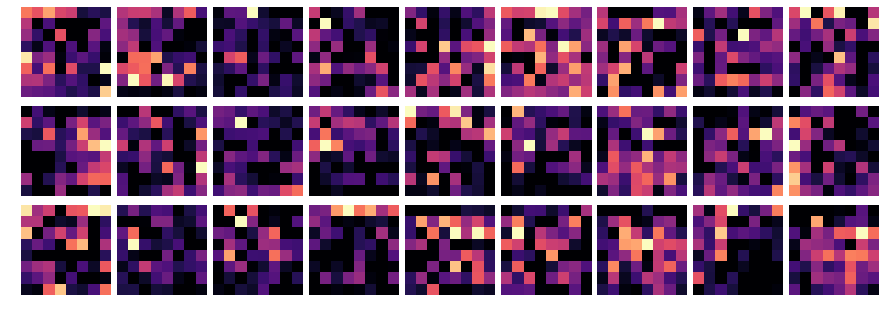

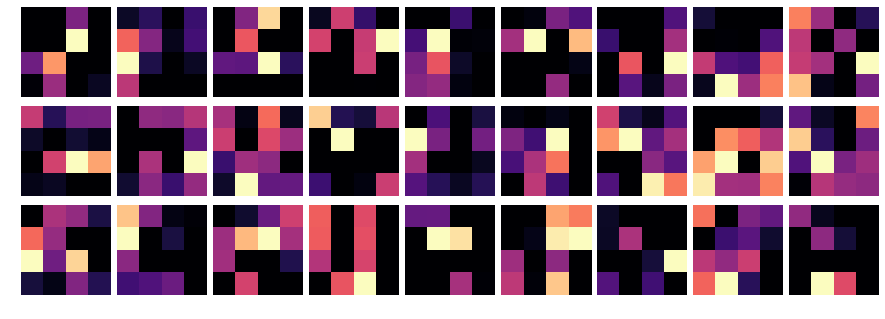

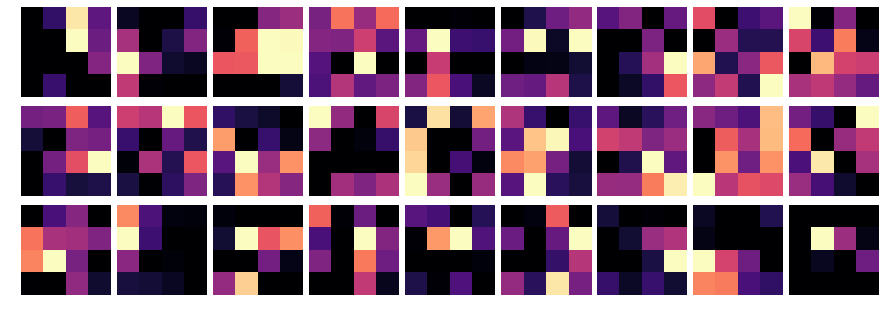

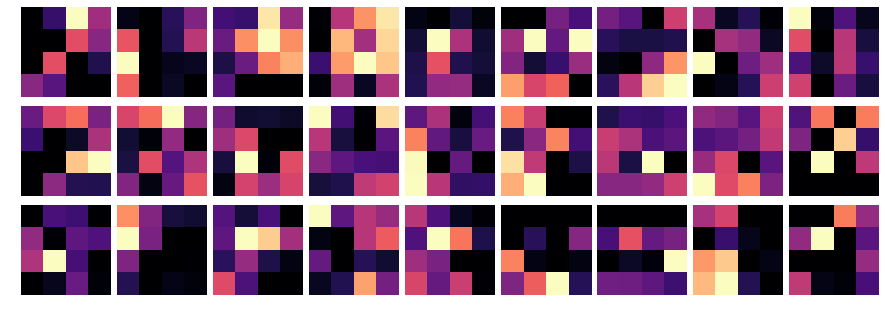

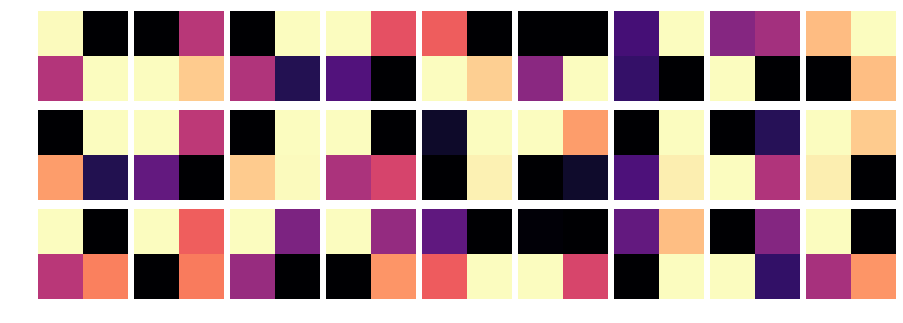

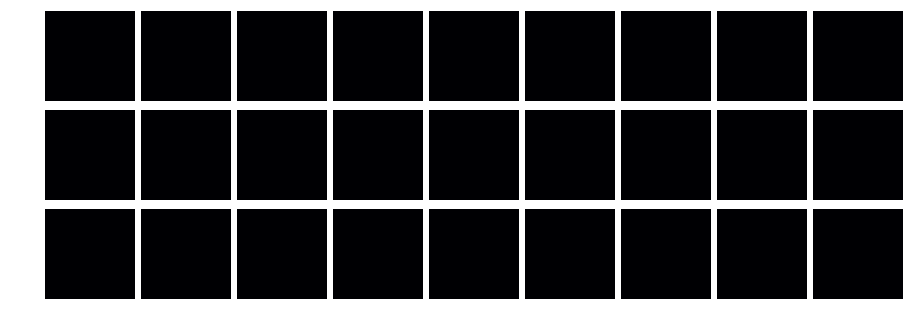

In [132]:
create_layer_vis(
    learn.model,
    "/home/subhaditya/.fastai/data/imagewoof2-160/train/n02105641/n02105641_6246.JPEG",
)